In [2]:
import matplotlib.pyplot as plt
from numpy import genfromtxt
import numpy as np

In [4]:
ordered_human_raw = genfromtxt('BigLogData/Ordered_human.txt', delimiter=',')   
ordered_vanilla_raw = genfromtxt('BigLogData/Ordered_vanilla.txt', delimiter=',')   
random_human_raw = genfromtxt('BigLogData/Random_human.txt', delimiter=',')   
random_vanilla_raw = genfromtxt('BigLogData/Random_vanilla.txt', delimiter=',')   
snapshot_raw = genfromtxt('BigLogData/Snapshots.txt', delimiter=',')

all_data = {"ordered_human": ordered_human_raw,
            "ordered_vanilla": ordered_vanilla_raw,
            "random_human": random_human_raw,
            "random_vanilla": random_vanilla_raw,
            "snapshot": snapshot_raw}

In [5]:
total_runs = 22500

num_time_steps = 15
models_per_timestep = 15
tests_per_model = 100
tests_per_timestep = models_per_timestep * tests_per_model

print(f"There total of {total_runs} runs.")
print(f"Every timestep had {models_per_timestep} models.")
print(f"Every model was tested {tests_per_model} times.")
print(f"Every timestep was tested {tests_per_timestep} times.")
ordered_human_raw.shape

There total of 22500 runs.
Every timestep had 15 models.
Every model was tested 100 times.
Every timestep was tested 1500 times.


(22500, 3)

In [6]:
for name, data in all_data.items():
    sum_vic = sum(data.transpose()[2])
    percent_vic = float(sum_vic)/total_runs * 100
    print(f"Total number of victories over all runs in {name} is {sum_vic} which is {percent_vic:.1f}%")

Total number of victories over all runs in ordered_human is 8224.0 which is 36.6%
Total number of victories over all runs in ordered_vanilla is 1390.0 which is 6.2%
Total number of victories over all runs in random_human is 3842.0 which is 17.1%
Total number of victories over all runs in random_vanilla is 951.0 which is 4.2%
Total number of victories over all runs in snapshot is 1883.0 which is 8.4%


In [8]:
split_data_dict = dict()
for name, data in all_data.items():
    split_data = np.array(np.split(data, num_time_steps))
    print(f"The results of {name} are:")
    treatment_data_list = []
    for timestep in range(num_time_steps):
        sum_vic_timestep = sum(split_data[timestep,:,2])
        print(f"\t {(timestep+1) * 5000}: {sum_vic_timestep}")
        treatment_data_list.append(sum_vic_timestep)
    split_data_dict[name] = np.array(treatment_data_list) 

The results of ordered_human are:
	 5000: 0.0
	 10000: 0.0
	 15000: 0.0
	 20000: 0.0
	 25000: 223.0
	 30000: 468.0
	 35000: 251.0
	 40000: 234.0
	 45000: 824.0
	 50000: 760.0
	 55000: 848.0
	 60000: 1155.0
	 65000: 1234.0
	 70000: 1114.0
	 75000: 1113.0
The results of ordered_vanilla are:
	 5000: 0.0
	 10000: 0.0
	 15000: 0.0
	 20000: 0.0
	 25000: 0.0
	 30000: 0.0
	 35000: 180.0
	 40000: 0.0
	 45000: 100.0
	 50000: 251.0
	 55000: 142.0
	 60000: 68.0
	 65000: 108.0
	 70000: 197.0
	 75000: 344.0
The results of random_human are:
	 5000: 0.0
	 10000: 0.0
	 15000: 0.0
	 20000: 0.0
	 25000: 0.0
	 30000: 0.0
	 35000: 0.0
	 40000: 0.0
	 45000: 25.0
	 50000: 402.0
	 55000: 385.0
	 60000: 683.0
	 65000: 646.0
	 70000: 1049.0
	 75000: 652.0
The results of random_vanilla are:
	 5000: 96.0
	 10000: 0.0
	 15000: 0.0
	 20000: 0.0
	 25000: 0.0
	 30000: 0.0
	 35000: 100.0
	 40000: 82.0
	 45000: 0.0
	 50000: 31.0
	 55000: 11.0
	 60000: 62.0
	 65000: 61.0
	 70000: 154.0
	 75000: 354.0
The results of snap

In [101]:
split_data_dict["ordered_human"][12]


1234.0

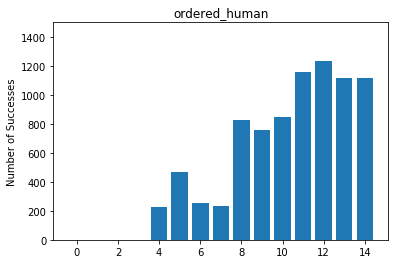

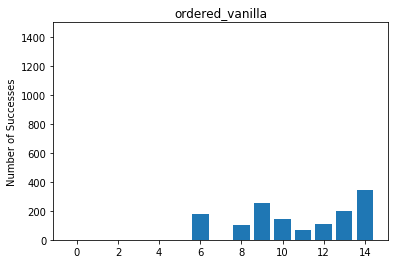

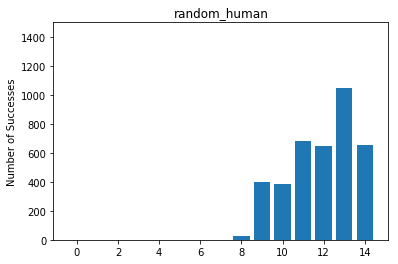

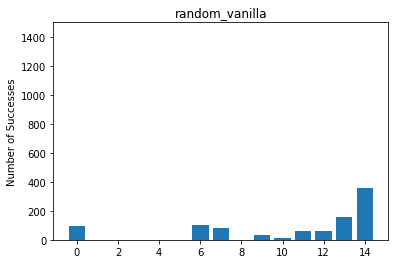

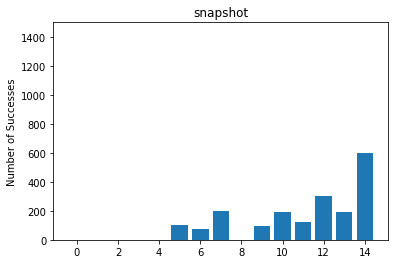

In [9]:
for name, data in split_data_dict.items():
    x_range = (list(range(15)))
    plt.bar(x_range, data)
    plt.ylabel('Number of Successes')
    plt.title(f'{name}')
    plt.ylim((0, 1500))
    plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

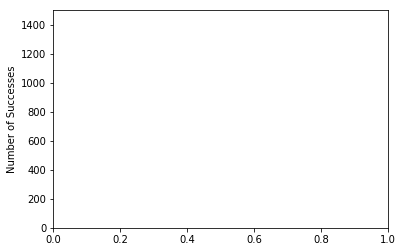

In [17]:
# data to plot
n_groups = 15

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8

x_range = np.array(list(range(15)))
plt.ylabel('Number of Successes')

plt.ylim((0, 1500))
 
# rects1 = plt.bar(x_range, list(split_data_dict.values())[0], bar_width,
#                  alpha=opacity,
#                  color='b',
#                  label='ordered_human')
 
rects2 = plt.bar(x_range + bar_width, list(split_data_dict.values())[1], bar_width,
                 alpha=opacity,
                 color='#757473',
                 label='ordered_vanilla')

# rects3 = plt.bar(x_range+ 2*bar_width, list(split_data_dict.values())[2], bar_width,
#                  alpha=opacity,
#                  color='r',
#                  label='random_human')

rects4 = plt.bar(x_range+2*bar_width, list(split_data_dict.values())[3], bar_width,
                 alpha=opacity,
                 color='#3b3a39',
                 label='random_vanilla')

rects5 = plt.bar(x_range+3*bar_width, list(split_data_dict.values())[4], bar_width,
                 alpha=opacity,
                 color='r',
                 label='snapshots')
 
plt.title('Scores by person')
plt.xticks(index + bar_width, x_range)
plt.legend()
 
plt.tight_layout()
plt.show()
